**정형데이터 실습**

1. 데이터 탐색
    * 기초통계량
    * 시각화

2. 회귀모형
    * 선형 회귀모형

3. 분류모형
    * K-nearest neighborhood
    * 의사결정나무
---

### 1. 데이터 탐색: iris 데이터

In [19]:
# 아래 모듈이 설치되어 있지 않은 경우 설치합니다.
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn

In [1]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
# 데이터프레임으로 변환
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# target도 데이터프레임 열로 구성하기
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['species'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [25]:
print(iris_df['petal length (cm)'].mean())

# 기초통계량을 종합적으로 확인
iris_df.describe()

3.7580000000000005


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# 그룹화
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['species'])

iris_df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


In [19]:
# 클래스값 바꾸기
class_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(class_mapping)

In [21]:
iris_df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [28]:
# 집계: 그룹별 기초통계량 산출
iris_df.groupby('species').agg(['mean', 'median'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median              mean   
species                                                                         
setosa                 5.006    5.0            3.428    3.4             1.462   
versicolor             5.936    5.9            2.770    2.8             4.260   
virginica              6.588    6.5            2.974    3.0             5.552   

                  petal width (cm)         
           median             mean median  
species                                    
setosa       1.50            0.246    0.2  
versicolor   4.35            1.326    1.3  
virginica    5.55            2.026    2.0

2. 시각화

    * 범주형 변수: 빈도표, bar plot, pie chart
    * 연속형 변수: 히스토그램

In [37]:
# 범주형 변수
# 1. 빈도표
iris_table = iris_df['species'].value_counts()
iris_table

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

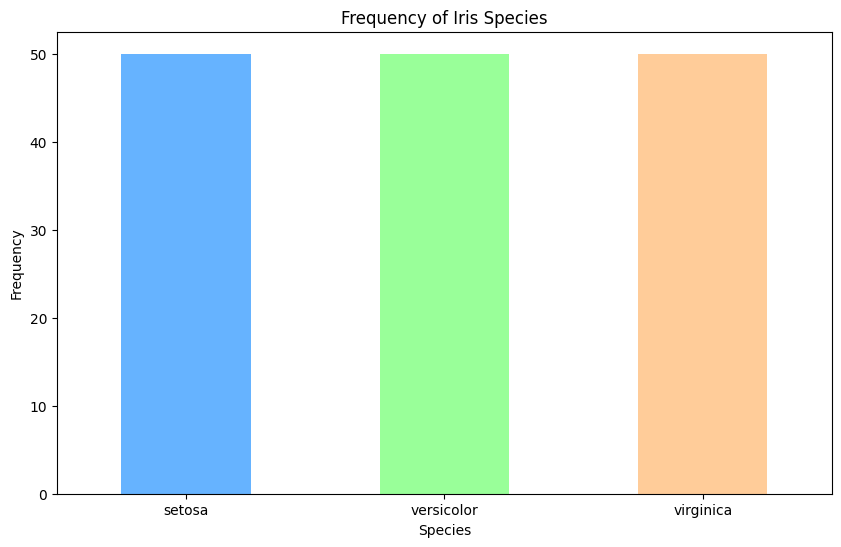

In [41]:
# 범주형 변수
# 2. bar plot
plt.figure(figsize=(10, 6))
iris_table.plot(kind='bar', color=['#66b3ff','#99ff99','#ffcc99'])
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Iris Species')
plt.xticks(rotation=0)
plt.show()

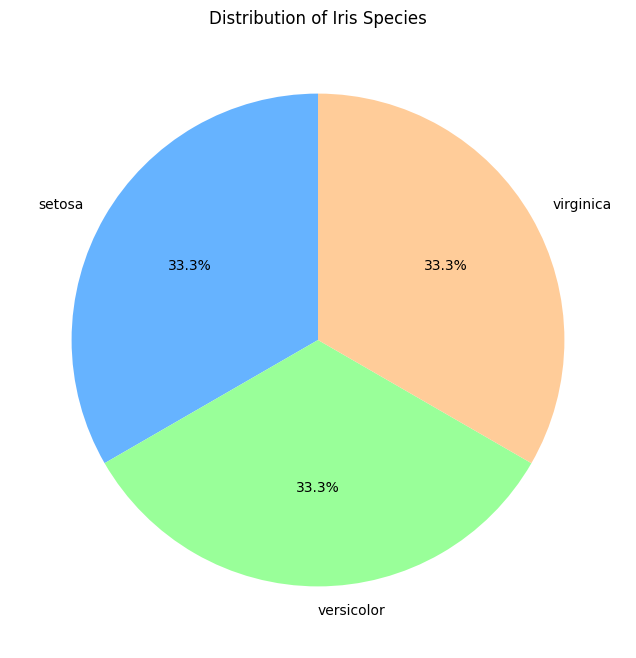

In [42]:
# 범주형 변수
# 3. pie chart

plt.figure(figsize=(8, 8))
plt.pie(iris_table, labels=iris_table.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Iris Species')
plt.show()

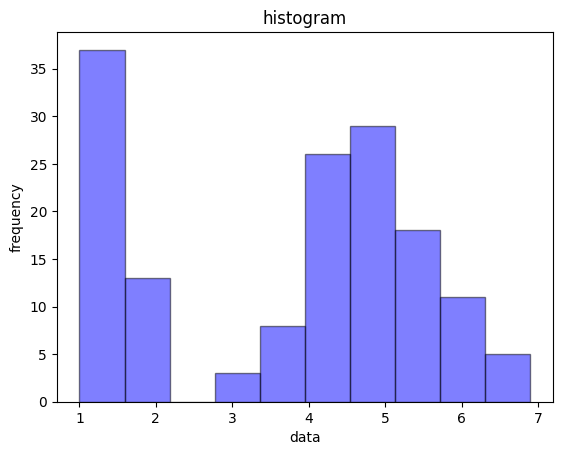

In [44]:
# 연속형 변수: 히스토그램 그리기
import matplotlib.pyplot as plt

plt.hist(iris_df['petal length (cm)'], bins=10, color='blue', edgecolor='black', alpha=0.5)
plt.xlabel('data')
plt.ylabel('frequency')
plt.title('histogram')

# 그래프 보이기
plt.show()


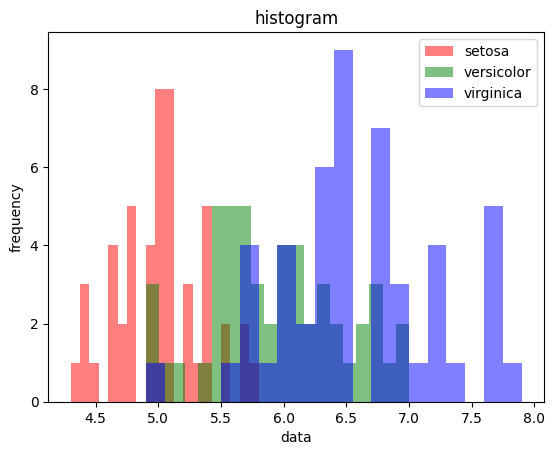

In [48]:
# 라벨 별로 히스토그램 그리기

# 각 품종에 대한 데이터 추출
setosa_data = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_data = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_data = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# 히스토그램 그리기
plt.hist(setosa_data, bins=20, alpha=0.5, label='setosa', color='r')
plt.hist(versicolor_data, bins=20, alpha=0.5, label='versicolor', color='g')
plt.hist(virginica_data, bins=20, alpha=0.5, label='virginica', color='b')

# 라벨과 범례 추가
plt.xlabel('data')
plt.ylabel('frequency')
plt.title('histogram')
plt.legend()

# 그래프 보이기
plt.show()


### 2. 회귀모형

* 선형회귀모형

In [14]:
from sklearn.linear_model import LinearRegression

# prepare data
X = iris.data[:, 2].reshape(-1, 1)
y = iris.data[:, 3]

In [15]:
# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련 (데이터에 적합)
model.fit(X, y)

LinearRegression()

Text(0, 0.5, 'petal width (cm)')

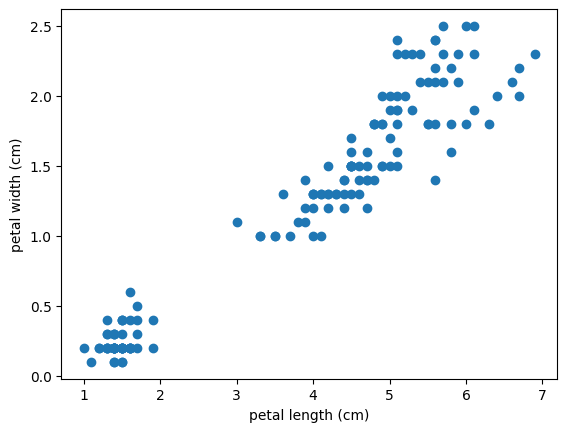

In [16]:
import matplotlib.pyplot as plt  # matplotlib 모듈을 import

# 회귀 직선 그리기
plt.scatter(X, y, label='Data Points')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

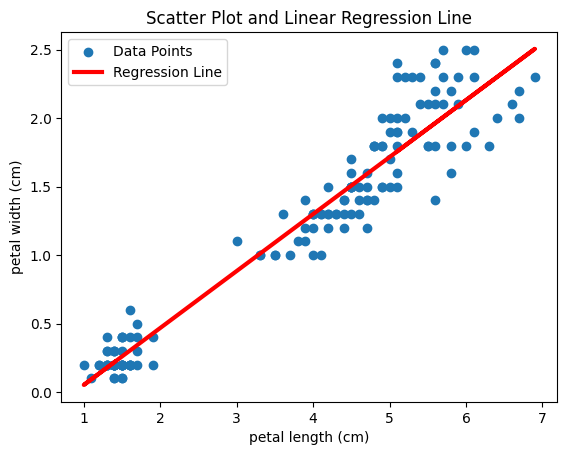

In [17]:
# 회귀선 그리기
plt.scatter(X, y, label='Data Points')
plt.plot(X, model.predict(X.reshape(-1, 1)), color='red', linewidth=3, label='Regression Line')

plt.legend()
plt.title('Scatter Plot and Linear Regression Line')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

### 3. 분류모형

* KNN

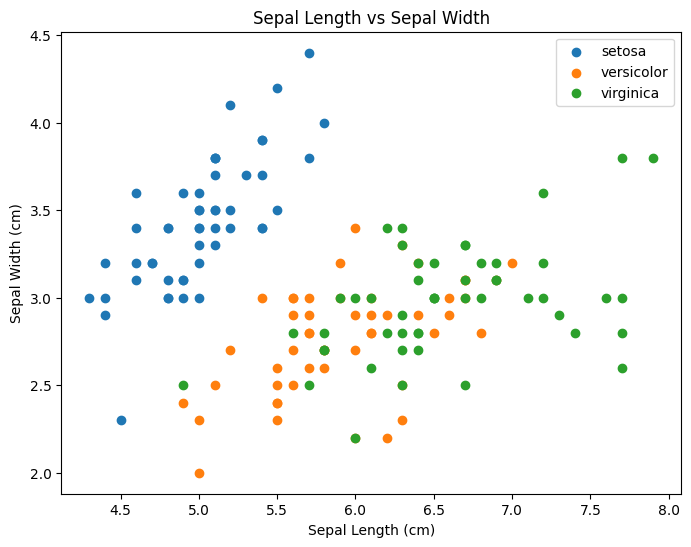

In [18]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt  # matplotlib 모듈을 import

iris = load_iris()
# prepare data
X = iris.data[:, :2]
y = iris.target

# 데이터 그룹별로 나누기
classes = list(set(y))  # 고유한 클래스 값 추출

plt.figure(figsize=(8, 6))

for cls in classes:
    indices = y == cls  # 현재 클래스에 해당하는 인덱스 선택
    plt.scatter(X[indices, 0], X[indices, 1], label=iris.target_names[cls])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()


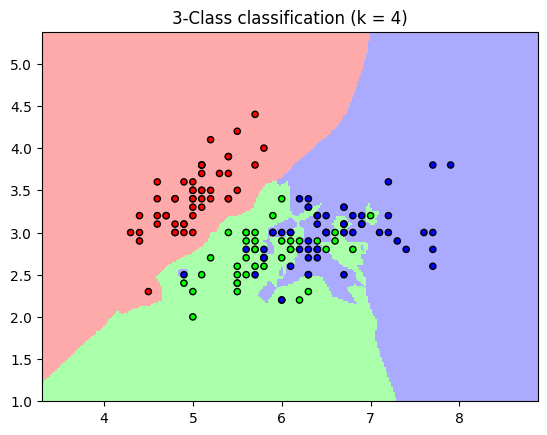

In [19]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

n_neighbors = 4

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Define a colormap for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Define a colormap for the training points
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Calculate min, max, and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()


* 의사결정나무

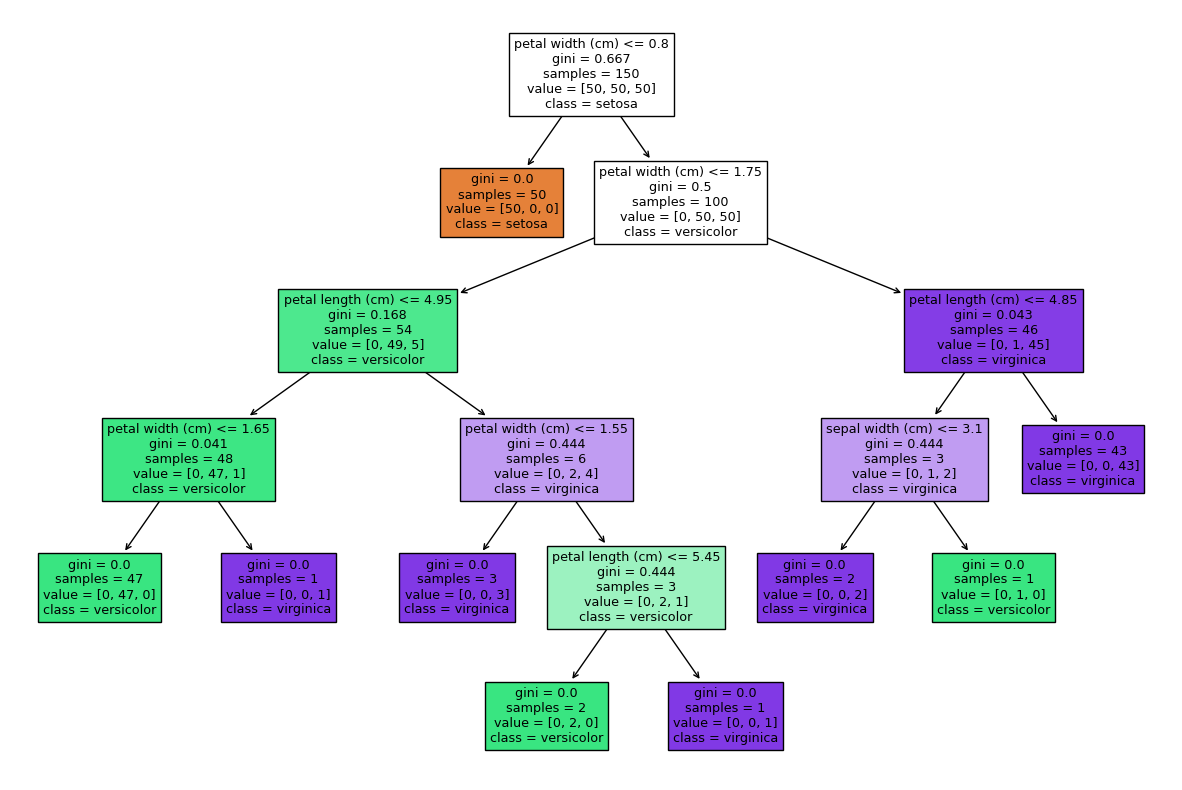

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

# Fit the model to the data
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
